<a href="https://colab.research.google.com/github/virb30/credit_risk_analysis/blob/main/Projeto_Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.


## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](https://drive.google.com/file/d/1rzri2Mz1sKhFrEfXmr4vhL4iBBd7RWIQ/view?usp=sharing). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [29]:
# importar pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#configurar pandas
pd.set_option("display.max_columns", None)

#configurar seaborn
sns.set_style()

## Análise exploratória
Vamos explorar nosso dataset de modo a tentar extrair o máximo de informações que nos ajudem a construir o modelo.

In [3]:
# importar arquivo
df = pd.read_csv('https://www.dropbox.com/s/oa3nluiuv4z684j/acquisition_train.csv?dl=1')

print(f'Dimensões do dataset')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Dimensões do dataset
Linhas: 45000
Colunas: 43


Em seguida vamos visualizar as 5 primeiras entradas do dataset para termos uma noção de como estão dispostos os dados

In [4]:
# visualizar as 5 primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Analisando os primeiros 5 registros tiramos algumas conclusões iniciais:
1. a coluna ids representa o identificador único do usuário. Provavelmente iremos removê-la pois não representa nenhuma informação relevante.
1. A variável alvo para esse modelo se chama `target_default` (risco de inadimplência).
1. Esse dataset possui outra variável alvo `target_fraud` que poderíamos utilizar para treinar outro tipo de modelo. Analisaremos mais à frente se essa variável pode nos ajudar ou se pode ser removida.
1. As colunas `score_3`, `score_4`, `score_5` e `score_6` são numéricas, enquanto que `score_1` e `score_2` estão codificadas. Possivelmente representem categorias. Analisaremos mais a frente se esse é o caso.
1. Outras variaveis `[reason, state, zip, channel, job_name, real_state]` também estão codificadas. Analisaremos se conseguimos extrair alguma informação relevante a partir delas.
1. A coluna `lat_lon` é uma tupla em formato de string com as coordenadas.
1. A coluna `profile_tags` aparentemente contém uma lista codificada de tags do perfil do usuário.
1. A coluna `user_agent` representa o dispositivo que o usuário utilizou, e não parece acrescentar nenhuma informação relevante, mas analisaremos mais a fundo.

In [5]:
# resumo estatístico
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Analisando o resumo estatístico percebemos que:
1. a coluna `external_data_provider_credit_checks_last_2_year` possui valor mínimo, máximo e desvio padrão iguais a 0. Provavelmente poderemos removê-la
1. a coluna `reported_income` possui valores `inf` que poderão interferir no treinamento do modelo. Substituiremos esse valor por NaN.
1. a coluna `external_data_provider_email_seen_before` possui como valor mínimo -999, que possivelmente trata-se de um outlier.

Vamos verificar os tipos de variáveis a fim de estabelecer quais são numéricas, quais precisarão ser convertidas e quais são categóricas.

In [6]:
# verificar tipos de variáveis
print(f'Tipos de variáveis:')
print(df.dtypes)

Tipos de variáveis:
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                 

Numa análise inicial todas as variáveis numéricas estão com tipos corretos.

Vamo verificar também a quantidade de valores ausentes por *feature*

In [7]:
# valores ausentes
print("\nValores Ausentes:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

Ao analisar os valores ausentes notamos algumas peculiaridades:
1. as colunas `[last_amount_borrowed, last_borrowed_in_months, ok_since, external_data_provider_credit_checks_last_2_year]` possuem mais de 50% de valores ausentes
1. as colunas `[external_data_provider_credit_checks_last_year, credit_limit, n_issues]` possuem entre 25-34% de valores ausentes.

A variável `target_fraud` possui 96% de valores ausentes, no entanto para esse projeto ela não será utilizada, portanto não representa um risco.

A seguir vamos análisar quantos valores únicos temos por *feature*. Essa etapa pode nos revelar variáveis numéricas que se comportam como categorias ou revelar classes demais para variáveis categóricas.

In [8]:
# ver valores únicos
print("Valores únicos")
print(df.nunique().sort_values())

Valores únicos
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44

A contagem de valores únicos nos revela que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` possuem apenas um valor único, portanto não representam nenhuma informação relevante para nosso modelo e poderão ser removidas.

O mesmo vale para a coluna `profile_phone_number` que possui 45000 registros únicos, e não acrescenta nenhuma informação relevante para nosso modelo.

A coluna `score_1` possui apenas 7 valores únicos, possivelmente poderemos extrair categorias dessa coluna, mas iremos analisar mais a fundo essa possibilidade.

Agora vamos verificar como está o balanceamento do nosso dataset ao analisar a quantidade de resultados para nossa variável alvo

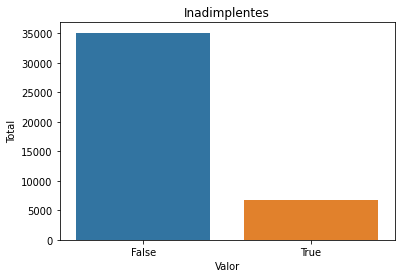

Proporção de Inadimplentes no dataset:

False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [9]:
fig, ax = plt.subplots()
sns.countplot(x='target_default', data=df, ax=ax)
ax.set_title('Inadimplentes')
ax.set_ylabel('Total')
ax.set_xlabel('Valor')

plt.show()

print('Proporção de Inadimplentes no dataset:\n')
print(df['target_default'].value_counts() / df.shape[0])

O gráfico acima nos mostra que temos mais dados de adimplentes que inadimplentes. Assim, poderemos treinar nosso modelo em 3 cenários diferentes e avaliar o melhor desempenho:
1. Dados desbalanceados
2. Dados balanceados com oversampling
3. Dados balanceados com undersampling

Nosso baseline será utilizando dados desbalanceados.

## Peparação dos dados

Nessa etapa faremos a limpeza e preparação dos dados conforme informações que obtivemos na análise.

In [10]:
# cria uma cópia do dataframe original
df_clean = df.copy()

# substitui valores inf por nan
df_clean['reported_income'].replace(np.inf, np.nan, inplace=True)

# eliminar colunas que não fornecem informações relevantes
# ids, target_fraud e external_data_provider_credit_checks_last_2_year
df_clean.drop(labels=['ids', 'target_fraud', 
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)

# substituir valores -999 da coluna external_data_provider_email_seen_before por nan
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# excluir colunas que não serão utilizadas
drop_vars = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'profile_tags', 'lat_lon', 'user_agent', 'profile_phone_number', 
             'shipping_zip_code', 'shipping_state', 'email', 'marketing_channel', 
             'application_time_applied']
df_clean.drop(labels=drop_vars, axis=1, inplace=True)

# eliminar as entradas que target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)

print("Total de registros após limpeza:")
df_clean.shape[0]

Total de registros após limpeza:


41741

Apesar de não haver mais informações sobre as colunas que possuem valores nulos podemos assumir algumas premissas:
1. Algumas variáveis não são obrigatórias, por exemplo perfil do cliente no Facebook;
1. Não existe nenhuma observação referente às colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`

Para as variáveis descritas no segundo caso, iremos substituir os valores `NaN` por zero. Para as variáveis numéricas utilizaremos a mediana e para as categóricas o valor mais frequente.

In [11]:
from sklearn.impute import SimpleImputer

# obtem colunas de df_clean cujo tipo não é 'object'
num_df = df_clean.select_dtypes(exclude='object').columns

# obtem colunas de df_clean cujo tipo é 'object'
cat_df = df_clean.select_dtypes(include='object').columns

# substituição dos valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

#variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Podemos ver agora que as variáveis selecionadas não possuem mais valores nulos

In [12]:
#verificar quantidade de dados nulos
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

Para melhorar o desempenho iremos normalizar as variáveis numéricas utilizando o `StandardScaler`

In [13]:
from sklearn.preprocessing import StandardScaler

# copia o dataframe
scaled_df = df_clean.copy()

# normalizar colunas numéricas
num_cols = scaled_df.drop('target_default', 
                          axis=1).select_dtypes(exclude='object').columns
                          
scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

Já para as variáveis categóricas iremos realizar o Label Encoding de modo que as variáveis categóricas sejam codificadas em *labels* e alimentar o modelo de *Machine Learning*

In [14]:
from sklearn.preprocessing import LabelEncoder

# criando cópia do df
encoded_df = scaled_df.copy()

# codificar as variáveis categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada variável categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, inplace=True, axis=1)

Por fim iremos separar os dados de treino e teste

In [15]:
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# dividir entre conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Construção do modelo

Após realizar o tratamento e separação dos dados precisamos:
* Criar um modelo para servir de base - chamaremos de *baseline*. Idealmente o baseline deveria ser a solução empregada no momento ou alguma métrica que não utiliza *Machine Learning*, como não temos esse cenário, iremos utilizar um modelo arbitrário sem parametrização para esse fim;
* Definir a melhor métrica para avaliar o modelo
* Comparar modelos diferentes com a métrica e o baseline
* Tunar os hiperparâmetros em um conjunto de validação
* Rodar o modelo com os dados de teste

### Métricas

Para decidir qual métrica utilizar vamos analisar nossas opções:
* A `acurácia` pode não ser a métrica ideal, mas nos fornece uma ideia inicial para criar uma solução mais generalista
* Se optarmos por otimizar o `Recall` estamos priorizando que não haja Falsos Negativos. Ou seja, é preferível negar um cliente que não traria prejuízos à empresa do que aceitar um que traga. Essa métrica é comumente utilizada para detectar fraudes em cartão de crédito, por exemplo.
* Se optarmos por otimizar a `Precision` estamos dizendo que Falsos Positivos são ok e não queremos ter falsos negativos. Ou seja, é preferível aceitar clientes que podem trazer prejuízo, do que deixar de aceitar clientes que não trarão. Essa métrica é comumente utilizada para detectar spam em e-mails.

O que irá definir a melhor métrica é a estratégia de negócio. Podemos supor que empresas mais conservadoras optarão por minimizar os Falsos Negativos, vizando minimizar a possibilidade de prejuízo - nesse caso otimizaríamos o `Recall` -, já para as mais ousadas, em que o objetivo é o crescimento (rápido) otimizaríamos a `Precision`.

Para nossa análise iremos começar utilizando a `Acurácia` como métrica para termos uma ideia inicial do desempenho dos modelos. E, em seguida faremos uma análise para as demais métricas citadas.

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# construindo a função de validação do modelo
def val_model(X, y, clf, title='Acurácia', scoring='accuracy', quite=False):
  """
  Realiza cross-validation com os dados de treino para determinado modelo

  # Arguments
    X: DataFrame, indepent variables
    y: Series, target variable
    clf: Scikit-learn model
    quite: bool, flag that indicates if function shoul print results
  
  # Returns
    float, mean of cross-validation scores
  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring=scoring)

  if quite == False:
    print("{:s}: {:.4f} (+/- {:.2f})".format(title, scores.mean(), scores.std()))

  return scores.mean()

# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Acurácia: 0.8432 (+/- 0.00)


Apesar de estarmos lidando com dados desbalanceados e sem nenhum tunning nos hiperparâmetros, nosso modelo base parece bastante competente.

Com Acurácia na casa dos 83% vamos ver o que conseguimos fazer para bater esse desempenho.

### Modelos

Para tentar bater essa baseline, vamos testar diferentes modelos:

* Random Forest Classifier (Baseline)
* Decision Tree Classifier
* SGD Classifier
* SVC
* Logistic Regression
* XGB Classifier
* LGBM Classifier

Nesse momento não iremos realizar nenhum tunning nos modelos, nosso intuito com esse teste é avaliar qual modelo tem melhor desempenho diante dos nossos dados - tratados porém desbalanceados.

In [16]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
acc = []
# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])


,acc
RandomForestClassifier,0.843726
DecisionTreeClassifier,0.742727
SGDClassifier,0.842597
SVC,0.843110
LogisticRegression,0.842837
XGBClassifier,0.844445
LGBMClassifier,0.844069


Após a execução dos modelos vemos que o `XGBClassifier` foi o que retornou os melhores resultados.

No entanto, a diferença entre eles foi pequena o que nos sugere que qualquer modelo poderia ser tão eficiente quando o XGB, no entanto, para essa primeira análise iremos prosseguir com ele.

Vale ressaltar que, nesse momento, estamos utilizando um dataset desbalanceado. Iremos balanceá-lo mais adiante para comparar os resultados.

Para o *tunning* do modelo, utilizaremos como referência os parâmetros descritos neste [link](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e), vamos utilizar o método `get_params` para visualizar os parâmetros que podem ser tunados para obtermos melhores resultados.


In [17]:
# verifica parâmetros tunáveis
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Nas próximas etapas vamos criar um novo modelo de modo que os testes anteriores não causem nenhum viés para a versão "final" do modelo.

Utilizaremos o `GridSearch` para descobrir quais os melhores parâmetros para nosso modelo dada uma lista de valores possíveis para eles.

In [33]:
# instanciar o modelo
xgb = XGBClassifier(random_state=42)

# definindo parâmetros a serem testados
param_grid = {
  'learning_rate': [0.001, 0.01, 0.1],  
  'gamma':[0, 1, 5],
  'subsample':[0.5, 0.8, 1],
  'max_depth': [3, 5],
  'n_estimators': [1000],
  'colsample_bytree': [1]
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.84 para {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}


Com os melhores parâmetros para tunning em mão, iremos instanciar e treinar nosso modelo.

In [32]:
# instanciando o modelo e treinando o mesmo
ml_model = XGBClassifier(learning_rate=0.1, max_depth=1, gamma=5,
                         n_estimators= 1000, min_child_weight=1, 
                         subsample = 0.5, colsample_bytree = 0.1,
                         random_state=42)

ml_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.1, gamma=5, max_depth=1, n_estimators=1000,
              random_state=42, subsample=0.5)

Com o modelo treinado vamos realizar as previsões com nossos dados de testes para validar a acurácia do modelo.

In [33]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Recall: {:.4f}\n".format(recall_score(y_test, y_pred)))
print("Precision: {:.4f}\n".format(precision_score(y_test, y_pred)))
print("F1 Score: {:.4f}\n".format(f1_score(y_test, y_pred)))

Acurácia: 0.8460

Recall: 0.0455

Precision: 0.5817

F1 Score: 0.0845



Os resultados acima nos revelam que, apesar da acurácia global, nesse caso, pode não ser uma boa métrica para medir o desempenho do nosso modelo, isso provavelmente seja causado pelo desbalanceamento do nosso *dataset*.

Para finalizar nossa análise iremos treinar outro modelo utilizando dados balanceados.

Balancearemos os dados de `encoded_df` utilizando o método `Smote` do `imblearn`. O balanceamento por *smote* irá realizar um over-sampling - produzir dados - da classe minoritária.

In [35]:
from imblearn import over_sampling

# balancear dados
sm = over_sampling.SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

# dividir conjuntos de treino e teste
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.3)

# instanciar e treinar modelo
final_model = XGBClassifier(learning_rate=0.1, max_depth=1, gamma=5,
                         n_estimators= 1000, min_child_weight=1, 
                         subsample = 0.5, colsample_bytree = 0.1,
                         random_state=42)

final_model.fit(X_balanced_train, y_balanced_train)

# previsões e probabilidades em cima do dataset de teste
y_balanced_pred = final_model.predict(X_balanced_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_balanced_test, y_balanced_pred)))
print("Recall: {:.4f}\n".format(recall_score(y_balanced_test, y_balanced_pred)))
print("Precision: {:.4f}\n".format(precision_score(y_balanced_test, y_balanced_pred)))
print("F1 Score: {:.4f}\n".format(f1_score(y_balanced_test, y_balanced_pred)))

Acurácia: 0.8366

Recall: 0.8074

Precision: 0.8588

F1 Score: 0.8323



Os resultados acima nos revelam que, com dados balanceados, apesar da acurácia global ter tido uma leve piora no desempenho, as demais métricas deixaram nosso modelo com melhor desempenho.

## Conclusão

Podemos perceber que o modelo que escolhemos é bastante sensível ao balanceamento do *dataset*. Se estivéssemos lidando com um cenário real, deveríamos considerar a estratégia de negócio da empresa para então otimizar o modelo seguindo a métrica correta.

### Melhorias e projetos futuros

Como proposta de melhoria e projetos futuros podemos citar melhorias no desempenho do modelo através de algumas estrágias, tais como:
* *Feature engineering*
* Treinar e comparar outros modelos treinados em dados balanceados.
* Otimizar os modelos seguindo outras métricas que não a acurácia.
